# Compare new projections with reference projections

Useful to test code after some development

In [1]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_dir = '../outputs/'
namelists =  ['CMIP5_glo_LEV14', 'CMIP5_glo_LEV14_ref']
sce ='rcp85'

proj_ds_list =  [xr.open_dataset(f'{data_dir}SeaLevelPerc_{namelists[0]}_{sce}.nc'),
                 xr.open_dataset(f'{data_dir}/ref_proj/SeaLevelPerc_{namelists[0]}_{sce}.nc')]


### Compare the percentiles in 2100

In [3]:
proj_ds_list[0].perc_ts.sel(time=2100, proc='Total')

<xarray.DataArray 'perc_ts' (percentiles: 11)>
array([ 51.017832,  58.692341,  63.154591,  67.401464,  68.908463,  81.403578,
        96.618267,  98.922499, 106.259456, 115.590604, 139.105537])
Coordinates:
    proc         <U5 'Total'
  * percentiles  (percentiles) int64 1 5 10 17 20 50 80 83 90 95 99
    time         int64 2100
Attributes:
    units:      cm
    long_name:  Time series of percentiles.

In [4]:
for idx, proj in enumerate(namelists):
    df = proj_ds_list[idx].perc_ts.sel(time=2100, proc='Total').to_dataframe()
    if idx == 0:
        tot_df = pd.DataFrame(df['perc_ts'])
        tot_df = tot_df.rename(columns={'perc_ts': proj})
    else:
        tot_df[proj] = df['perc_ts']
tot_df

,CMIP5_glo_LEV14,CMIP5_glo_LEV14_ref
percentiles,,
1,51.017832,49.763148
5,58.692341,57.904075
10,63.154591,62.652147
17,67.401464,67.156457
20,68.908463,68.757732
50,81.403578,82.108769
80,96.618267,98.663191
83,98.922499,101.225999
90,106.259456,109.359093


### Compare the time series of individual contributors

In [5]:
nb_proc = len(proj_ds_list[0].proc)
perc = 50

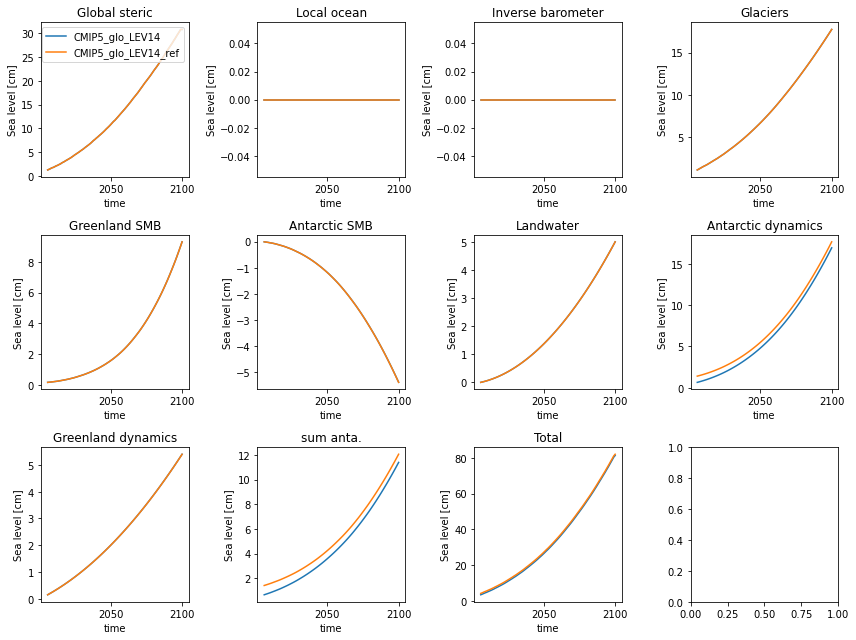

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12,9))
for m in range(nb_proc):
    lin=int(m/4)
    col=m%4
    for i in range(len(proj_ds_list)):
        proj_ds_list[i]['perc_ts'].attrs['long_name'] = 'Sea level'
        proj_ds_list[i].perc_ts.sel(percentiles=perc).isel(proc=m).plot(ax=axes[lin,col])
    axes[lin,col].set_title(proj_ds_list[0].proc[m].values)
axes[0,0].legend(namelists)
plt.tight_layout()